# Исследование объявлений о продаже квартир

Задача. Исследование данных сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.   
Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# План исследования:  
    1. Изучить данные, выявить аномалии, устранить пропуски, изменить типы данных.  
    2. Добавить новые столбцы, необходимые для исследования  
    3. Провести исследовательский анализ:  
        3.1 Выяснить как быстро продавались квартиры  
        3.2 Изучить факторы, влиящие на цену  
        3.3 Посчитать среднюю цену кв.метра  
        3.4 Выяснить, как стоимость обьекта зависит от расстояния от центра  
    4. Сделать выводы  

### Изучение информации о датасете ###

In [1]:
import pandas as pd
import numpy as np
import datetime as dt  
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.info()
data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Вывод**  
Датафрейм содержит 23699 строк. 
Данные содержат пропуски и аномальные значения.  

### Предобработка данных

Проследим природу пропусков, почистим данные от аномальных значений.

In [3]:
# выясняем, в каких строках есть пропущенные значения
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<AxesSubplot:>

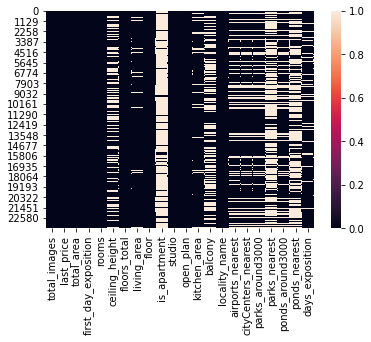

In [4]:
#построить тепловую карты, чтобы визуально оценить масштабы пропусков в данных.
sns.heatmap(data.isnull())

#### Обрабока пропущенных значений ####



Приступим к обработке пропущенных значений.
Для начала удалим строки в пропущенными значениями в тех столбцах где их невозможно восстановить без искажения данных:
floors_total, locality_name. Таких данных в указанных столбцах 1-2%, потеря этих данных не повлияет на результат. 

In [7]:
# удаляем строки с пропущенными значениями столбца floors_total, locality_name. 
data = data.dropna(subset=['locality_name','floors_total'])

# заполняем пропущенные данные о наличии балкона нулями и изменим тип данных на int
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

# заполняем пропущенные значения в столбце is_apartment значением False. 
data['is_apartment'] = data['is_apartment'].fillna(False)

#заменим пропущенные строки столбца ceiling_height медианным значением
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

# заполним пропущенные значения столбца kitchen_area медианным значением 
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

# пропущенные значения столбцов parks_around3000 и  ponds _around3000 заполним нулями
data['ponds_around3000'] = data['ponds_around3000'].fillna(0.0)
data['parks_around3000'] = data['parks_around3000'].fillna(0.0)

# изменим тип данных на int для дальнейших расчетов
data['last_price'] = data['last_price'].astype('int')



In [4]:
# проверка данных после изменения значений
data[data['total_area']*0.9 <= (data['living_area'] + data['kitchen_area'])]
data[data['total_area']*0.9 <= (data['living_area'] + data['balcony'])]
data[data['total_area']*0.9 <= (data['living_area'] + data['kitchen_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,NaN,14.0,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9.0,38.0,8,NaN,...,10.0,1.0,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9.0,26.1,5,NaN,...,6.2,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,8,3890000.0,37.0,2018-07-09T00:00:00,1,2.50,25.0,28.0,6,NaN,...,9.0,NaN,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
319,19,4850000.0,59.7,2015-03-19T00:00:00,3,2.50,5.0,47.4,4,NaN,...,6.4,1.0,Санкт-Петербург,43095.0,15599.0,0.0,NaN,0.0,NaN,974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23216,15,10150000.0,114.0,2015-01-21T00:00:00,4,NaN,5.0,90.2,4,NaN,...,16.0,NaN,Санкт-Петербург,26259.0,4961.0,0.0,NaN,2.0,838.0,1052.0
23297,10,1850000.0,48.2,2019-03-13T00:00:00,2,NaN,5.0,42.2,2,NaN,...,6.0,1.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23328,12,4299000.0,54.0,2016-11-25T00:00:00,2,NaN,14.0,40.0,8,NaN,...,10.0,0.0,Колпино,25612.0,31399.0,0.0,NaN,0.0,NaN,343.0
23521,13,8500000.0,65.0,2018-11-01T00:00:00,2,NaN,4.0,44.0,2,NaN,...,15.3,NaN,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,NaN


In [5]:
#переведем столбец с датой в формат даты без времени
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],\
                                              format = '%Y-%m-%d')

data['days_exposition'] = data['days_exposition'].fillna((pd.to_datetime\
                    ('today') - data['first_day_exposition']).dt\
                                                 .round('D').dt.days)


In [6]:
t_data = data
t_data['cityCenters_nearest'] = t_data['cityCenters_nearest'].fillna(0)
city_dict = {}
for row in t_data.to_dict('records'):
    city_dict [row['locality_name']]=0
for row in t_data.to_dict('records'):
    if row['cityCenters_nearest']== 0:
        city_dict [row['locality_name']]+=1
local_center_table = pd.DataFrame.from_dict(city_dict ,\
                                            orient='index',\
                                            columns = ['count_nan'])
local_center_table=local_center_table.sort_values(by ='count_nan',\
                                                  ascending=False)
local_center_table.head(20)

,count_nan
посёлок Мурино,522
Всеволожск,398
Гатчина,307
деревня Кудрово,299
Выборг,237
Кудрово,173
деревня Новое Девяткино,144
Сертолово,142
Кириши,125
Сланцы,112


In [8]:
#заменим пропущенные значения столбцов с расстоянием от дома до парка, аэропорта, центра города, пруда средними значениями, там где это возможно.

for d in data['locality_name'].unique():
    data.loc[(data['locality_name'] == d)&(data['cityCenters_nearest'].isna()),\
                                           'cityCenters_nearest'] = \
    data.loc[(data['locality_name'] == d), 'cityCenters_nearest'].mean()
    data.loc[(data['locality_name'] == d)&(data['airports_nearest'].isna()),\
                                           'airports_nearest'] = \
    data.loc[(data['locality_name'] == d), 'airports_nearest'].mean()
    data.loc[(data['locality_name'] == d)&(data['parks_nearest'].isna()),\
                                           'parks_nearest'] = \
    data.loc[(data['locality_name'] == d), 'parks_nearest'].mean()
    data.loc[(data['locality_name'] == d)&(data['ponds_nearest'].isna()),\
                                           'ponds_nearest'] = \
    data.loc[(data['locality_name'] == d), 'ponds_nearest'].mean()



In [9]:
# изучим данные столбца locality_name, уберем неявные дубликаты,
# унифицируем названия населенных пунктов, поменяем ё на е.
# получаем список всех значений столбца
data['locality_name'].value_counts().sort_index()

data['locality_name'] = data['locality_name'].str\
                                    .replace('ё', 'е')
data['locality_name'] = data['locality_name'].str\
                        .replace('городской поселок','поселок городского типа')
data['locality_name'] = data['locality_name'].str\
                        .replace('поселок при железнодорожной станции',\
                                 'поселок станции')
data['locality_name'] = data['locality_name'].str\
                        .replace('садоводческое некоммерческое товарищество',\
                                 'СНТ')
data['locality_name'] = data['locality_name'].str\
                        .replace('садовое товарищество','СНТ')
data['locality_name'] = data['locality_name'].str\
                        .replace('поселок Мурино','Мурино')
# неявные дубликаты устранены

In [51]:
data.locality_name.nunique()

320

In [50]:
data.drop_duplicates(['total_area','floor','floors_total','cityCenters_nearest',\
                     'locality_name','rooms'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_of_publication,month_of_publication,year_of_publication,floor_category,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3.0,2.70,16.0,51.0,8,NaN,...,482.0,2.0,755.000000,1702.0,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1.0,NaN,11.0,18.6,1,NaN,...,NaN,0.0,573.217105,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2.0,NaN,5.0,34.3,4,NaN,...,90.0,2.0,574.000000,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3.0,NaN,14.0,NaN,9,NaN,...,84.0,3.0,234.000000,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2.0,3.03,14.0,32.0,13,NaN,...,112.0,1.0,48.000000,121.0,100000.000000,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3.0,3.70,5.0,73.3,3,NaN,...,796.0,3.0,381.000000,2418.0,72490.845228,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3.0,NaN,5.0,38.0,4,NaN,...,NaN,NaN,NaN,45.0,52542.372881,0,1,2018,другой,0.0
23696,18,2500000.0,56.70,2018-02-11,2.0,NaN,3.0,29.7,1,NaN,...,NaN,NaN,NaN,2091.0,44091.710758,6,2,2018,первый,0.0
23697,13,11475000.0,76.75,2017-03-28,2.0,3.00,17.0,NaN,12,NaN,...,173.0,3.0,196.000000,602.0,149511.400651,1,3,2017,другой,10.0


#### Обрабока аномалий ####

Изучим данные и обработаем аномальные значения столбцов:  
- total_area  
- living_area  
- ceiling_height  
- floors_total  

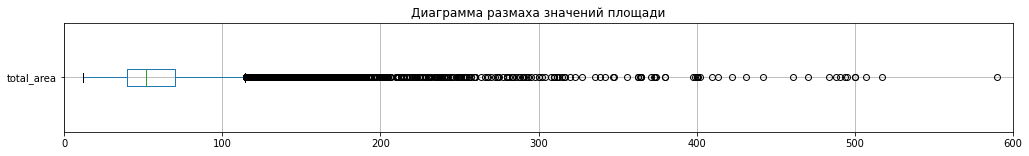

In [16]:
# аномалии столбца total_area
data['total_area'].describe()
# видим, что максимальная площать 631 м².
# построим график, чтобы определить, есть ли выбросы

fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 600);
#по графику видно, что есть аномалии. 
data[data['total_area'] > 500].sort_values('total_area').tail(10);


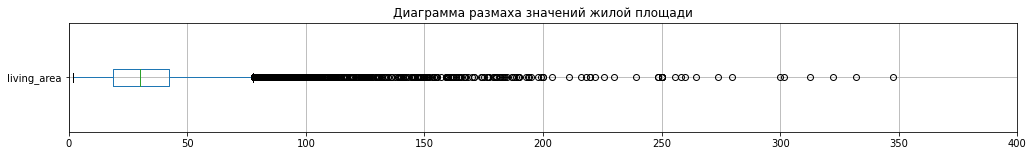

In [17]:
# аномалии столбца living_area
data['living_area'].describe()
# видим, что максимальная площать 312 м²
# при этом среднее значение не сиьно отличается от медианы
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['living_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений жилой площади')
ax.set_xlim(0, 400);

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000.0,55.0,2018-10-31,2,1.00,12.0,32.4,7,NaN,...,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.000000,2.0,289.0,13.0
5712,5,1500000.0,42.8,2017-08-14,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,поселок городского типа Мга,NaN,0.0,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,498.597886,3.0,80.0,71.0


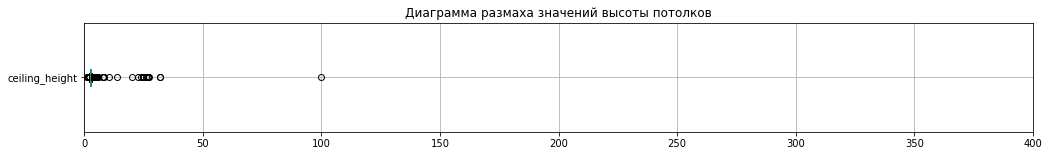

In [21]:
# изучим столбец ceiling_height на предмет аномальных значений
data['ceiling_height'].describe()

fig, ax = plt.subplots(figsize = (17,2))
ax = data[['ceiling_height']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений высоты потолков')
ax.set_xlim(0, 400);

# отфильтруем таблицу по столбцу ceiling_height
data[data['ceiling_height'] > 4].sort_values('ceiling_height').tail(10)
data[data['ceiling_height'] < 2].sort_values('ceiling_height').tail(10)
# получаем 28 аномальных значений. 
# они могли возникнуть из-за некоректного преобразования чисел float в int 

Квартиры с высотой потолков 32,27,17 или ниже 2 метров можно считать аномалиями

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16731,9,3978000,40.0,2018-09-24,1,2.65,52.0,10.5,18,False,...,14.0,0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,520.391129,45.0
2253,12,3800000,45.5,2018-06-28,2,2.88,60.0,27.4,4,False,...,7.4,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.000000,166.0


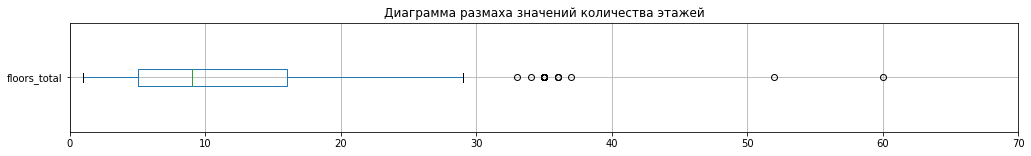

In [21]:
# аномалии столбца floors_total
data['floors_total'].describe()
data['floors_total'].astype(np.int64)

fig, ax = plt.subplots(figsize = (17,2))
ax = data[['floors_total']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений количества этажей')
ax.set_xlim(0, 70);
# фильтруем таблицу, проверим, в каком городе находятся эти здания. 
data[data['floors_total'] > 40].sort_values('floors_total').tail(10)



Здания выше 40 этажей можно считать редкостями. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18867,1,470000.0,41.0,2018-02-11,1,NaN,5.0,32.0,3,NaN,...,9.0,NaN,деревня Выскатка,NaN,0.0,NaN,NaN,NaN,NaN,46.0
23484,11,470000.0,44.5,2018-07-02,2,NaN,2.0,28.0,2,NaN,...,7.5,NaN,Сланцы,NaN,0.0,NaN,NaN,NaN,NaN,298.0
21912,0,470000.0,37.0,2018-02-18,1,NaN,3.0,NaN,3,NaN,...,NaN,NaN,поселок Совхозный,NaN,0.0,NaN,NaN,NaN,NaN,45.0
16032,8,480000.0,32.0,2019-01-06,1,NaN,2.0,16.0,1,NaN,...,NaN,NaN,Сланцы,NaN,0.0,NaN,NaN,NaN,NaN,83.0
10782,3,490000.0,29.1,2016-05-05,1,2.5,5.0,17.0,5,NaN,...,5.5,NaN,Сланцы,NaN,0.0,NaN,NaN,NaN,NaN,719.0
6859,6,490000.0,40.0,2017-12-11,1,NaN,5.0,NaN,3,NaN,...,NaN,NaN,деревня Старополье,NaN,0.0,NaN,NaN,NaN,NaN,43.0
1436,19,330000000.0,190.0,2018-04-04,3,3.5,7.0,95.0,5,NaN,...,40.0,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.000000,3.0,285.0,233.0
14706,15,401300000.0,401.0,2016-02-20,5,NaN,9.0,204.0,9,False,...,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.000000,1.0,478.0,393.0
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,498.597886,2.0,318.0,106.0
12971,19,763000000.0,400.0,2017-09-30,7,NaN,10.0,250.0,10,NaN,...,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.000000,3.0,756.0,33.0


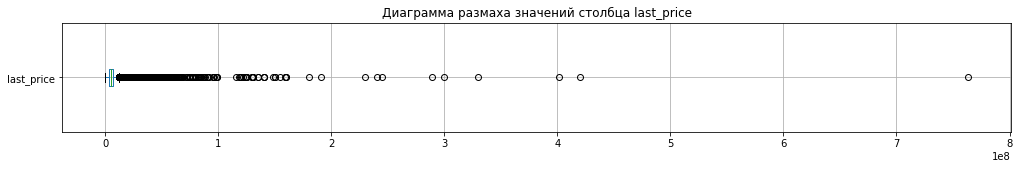

In [25]:
# аномалии столбца last_price
# строим график
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['last_price']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений столбца last_price')
ax.set_xlim();
#есть аномалии,смотрим, нужно ли удалять данные
data[(data['last_price'] > 300000000)|(data['last_price'] < 500000)]\
                                .sort_values('last_price').tail(10)

# данные оставляем

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [24]:
# проверим какие аномалии остались

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","21,700.00","23,565.00","23,565.00","23,565.00"
min,0.00,12.00,1.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,100.00,"3,058.00","763,000,000.00",409.70,112.00,33.00,60.00


#### Работа с редкими значениями столбцов

Найти редкие значения
'rooms',
'total_area',
'days_exposition',
'last_price',
'living_area',  
'kitchen_area', 
'floors_total'

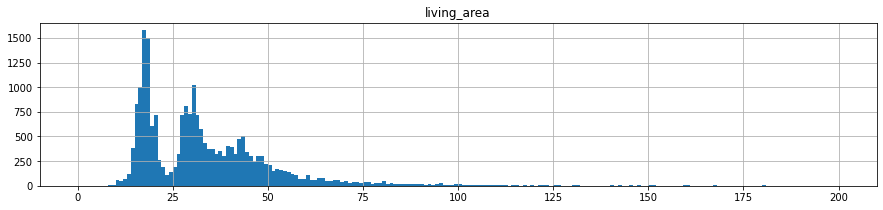

In [37]:

data.hist(column = 'living_area', bins = 200, figsize = (15,3),\
                                              range = (0,200));

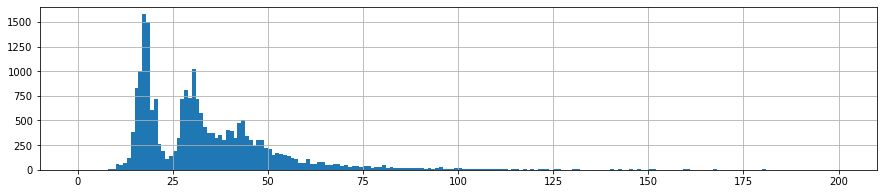

In [38]:

data.living_area.hist(bins = 200, figsize = (15,3), range = (0,200));

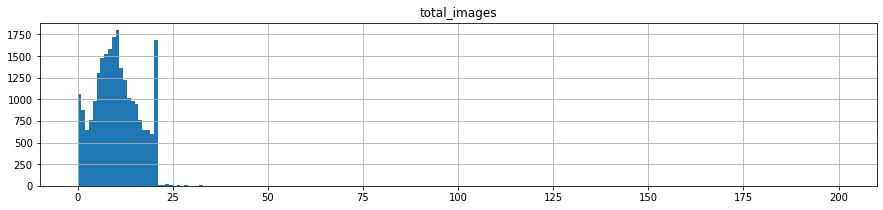

In [49]:

data.hist(column = 'total_images', bins = 200, figsize = (15,3),\
                                                range = (0,200));


**Считаем редкостями и удаляем из датафрейма:** 
          
  1. все квартиры площадью больше 250 м2 и меньше 10 м2;    
  2. квартиры с более чем 10 комнатами;  
  3. квартиры дороже 50 млн. руб и дешевле 1 млн.руб;  
  4. высоту потолка меньше 2,5;    
  5. высоту здания больше 40 этажей.  

In [40]:
#убираем редкости
data= data[(data['total_area'] <= 250) & (data['total_area'] > 10)]
data= data[data['rooms'] < 10]
data= data[(data['last_price']<50000000) & (data['last_price']>1000000)]
data= data[(data['ceiling_height'] >= 2.5) | (data['ceiling_height'].isna())]
data= data[data['rooms'] < 10]
data= data[(data['floors_total']<40)| (data['floors_total'].isna())]

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23048 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23048 non-null  int64         
 1   last_price            23048 non-null  int64         
 2   total_area            23048 non-null  float64       
 3   first_day_exposition  23048 non-null  datetime64[ns]
 4   rooms                 23048 non-null  int64         
 5   ceiling_height        23048 non-null  float64       
 6   floors_total          23048 non-null  float64       
 7   living_area           21259 non-null  float64       
 8   floor                 23048 non-null  int64         
 9   is_apartment          23048 non-null  bool          
 10  studio                23048 non-null  bool          
 11  open_plan             23048 non-null  bool          
 12  kitchen_area          23048 non-null  float64       
 13  balcony         

In [52]:

# Значения параметров объектов недвижимости на разных квантилях
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.00,2.30,3.00,"561,984.00",10.00,3.77,1.00,2.00
0.01,1.00,25.20,2.50,4.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.5,2.00,52.00,2.65,124.00,"4,650,000.00",30.00,9.10,4.00,9.00
0.99,5.00,197.00,3.83,"2,263.00","35,970,242.56",120.00,35.00,23.00,26.00
0.9988,8.00,380.00,25.00,"2,994.00","124,793,664.00",219.77,58.94,26.00,35.00


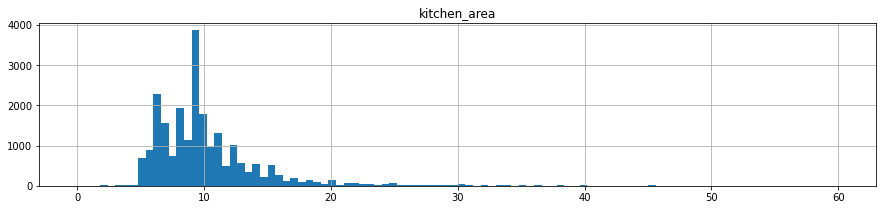

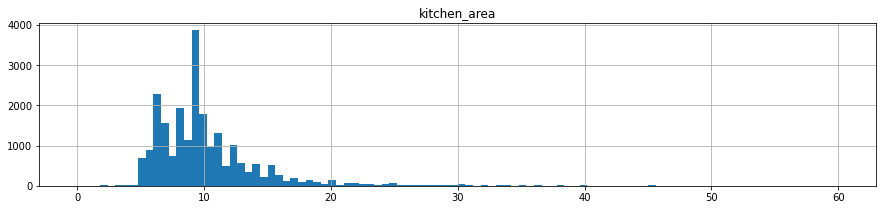

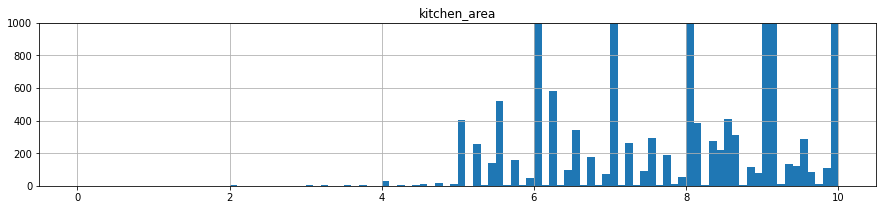

In [45]:
#data['kitchen_area'] = data[data['kitchen_area'].notnull()]['kitchen_area'].astype('int')
data.hist(column = 'kitchen_area', bins = 100, figsize = (15,3), range = (0,60))
data.hist(column = 'kitchen_area', bins = 100, figsize = (15,3), range = (0,60))
data.hist(column = 'kitchen_area', bins = 100, figsize = (15,3), range = (0,10))
plt.ylim(0, 1000);

data= data[(data['kitchen_area']<=50) & (data['kitchen_area']>=4)]


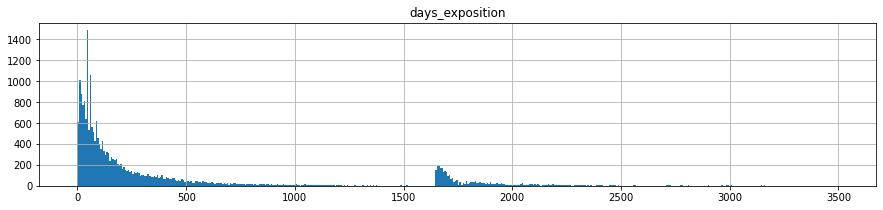

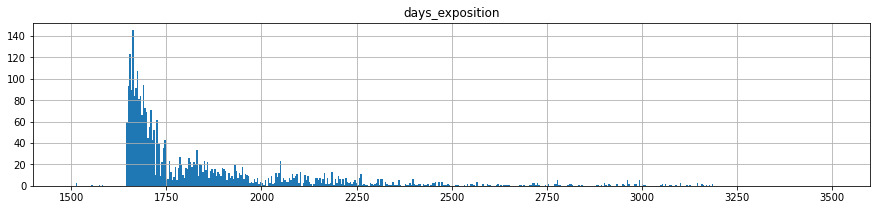

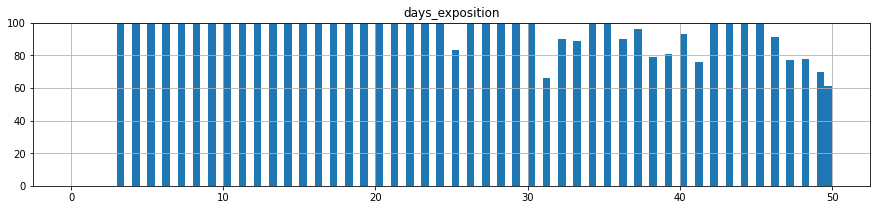

In [54]:
data['days_exposition'] = data['days_exposition'].apply(pd.to_numeric)

data.hist(column = 'days_exposition', bins = 500, figsize = (15,3), range = (0,3500));
data.hist(column = 'days_exposition', bins = 500, figsize = (15,3), range = (1500,3500))
data.hist(column = 'days_exposition', bins = 100, figsize = (15,3), range = (0,50))

plt.ylim(0, 100);
data=data[(data['days_exposition']>2)&(data['days_exposition']<3200)]

In [28]:
#оцениваем, сколько  осталось пропусков, после обработки
data.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23665 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23665 non-null  int64         
 1   last_price            23665 non-null  float64       
 2   total_area            23665 non-null  float64       
 3   first_day_exposition  23665 non-null  datetime64[ns]
 4   rooms                 23665 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23579 non-null  float64       
 7   living_area           21764 non-null  float64       
 8   floor                 23665 non-null  int64         
 9   is_apartment          2769 non-null   object        
 10  studio                23665 non-null  bool          
 11  open_plan             23665 non-null  bool          
 12  kitchen_area          21388 non-null  float64       
 13  balcony         

#### Результаты предобработки ####  

1. Удалили строки, значения которых невозможно установить без искажения результатов стоблцов floors_total, locality_name;  
2. Произвели замены неявных дубликатов столбца locality_name;
3. Изменили формат в строках с датами;
4. Заполнили отсутствующие значения в строках, где это можно было сделать без искажения данных;
5. Обработали аномалии столбцов total_area, living_area, ceiling_height, floors_total.Удалили данные, там где это необходимо для корректного исследования;  
7. Оставили пропускив столбце day_exposition,возможно, квартира еще не продана;
6. Оставили без изменения столбцы с даными о расстоянии до парка, аэропорта, пруда, центра. Так как невозможно корректно восстановить эти данные.  

Всего в таблице до обработки было 23699 строк. После обработки стало 22758. Потеря данных = 4%



### Добавление новых столбцов ###

Добавим в таблицу новые столбцы со следующими параметрами:

**square_meter_price** - цена одного квадратного метра;  
**day of publication** - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);  
**month_of_publication** - месяц публикациmи объявления;  
**year_of_publication** - год публикации объявления;  
**floor_category** - тип этажа квартиры (значения — «первый», «последний», «другой»);  
**cityCenters_nearest_km** - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений). 

In [55]:
data['total_area'] = data['total_area'].astype(np.float64)
data['last_price'] = data['last_price'].astype(np.float64)
data['living_area'] = data['living_area'].astype(np.float64)
data['rooms'] = data['rooms'].astype(np.float64)
data['living_area'] = data['living_area'].astype(np.float64)
data['kitchen_area'] = data['kitchen_area'].astype(np.float64)
data['floors_total'] = data['floors_total'].astype(np.float64);


In [56]:
data['square_meter_price'] = data['last_price'] / data['total_area'];


In [57]:
# добавим столбец с информацией о днях недели публикации объявления
data['day_of_publication'] = data['first_day_exposition'].dt.weekday

# добавим столбец с информацией о месяце публикации
data['month_of_publication'] = data['first_day_exposition'].dt.month

# добавим столбец с информацией о годе публикации
data['year_of_publication'] = data['first_day_exposition'].dt.year

In [58]:
# добавим столбец, фильтрующий данные о этаже 
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'


In [59]:
data['floor_category'] = data.apply(floor_category, axis = 1)

In [60]:
# добавим столбец с информацией о расстоянии до центра города в километрах 
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000)
data['cityCenters_nearest_km']  = data['cityCenters_nearest_km'].round()

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23665 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23665 non-null  int64         
 1   last_price              23665 non-null  float64       
 2   total_area              23665 non-null  float64       
 3   first_day_exposition    23665 non-null  datetime64[ns]
 4   rooms                   23665 non-null  float64       
 5   ceiling_height          14481 non-null  float64       
 6   floors_total            23579 non-null  float64       
 7   living_area             21764 non-null  float64       
 8   floor                   23665 non-null  int64         
 9   is_apartment            2769 non-null   object        
 10  studio                  23665 non-null  bool          
 11  open_plan               23665 non-null  bool          
 12  kitchen_area            21388 non-null  float6

### Исследовательский анализ данных

Далее изучим данные с помощью describe и построим диаграммы для столбцов:  
  
    1- общая площадь;  
    2- жилая площадь;  
    3- площадь кухни;  
    4- цена объекта;  
    5- количество комнат;  
    6- высота потолков;  
    7- этаж квартиры;  
    8- тип этажа квартиры («первый», «последний», «другой»);  
    9- общее количество этажей в доме;  
    10- расстояние до центра города в метрах;  
    11- расстояние до ближайшего аэропорта;  
    12- расстояние до ближайшего парка;  
    13- день и месяц публикации объявления.  



count    14481.0
mean         2.8
std          1.3
min          1.0
25%          2.5
50%          2.6
75%          2.8
max        100.0
Name: ceiling_height, dtype: float64

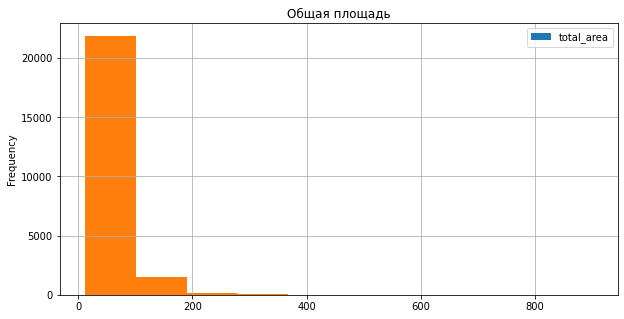

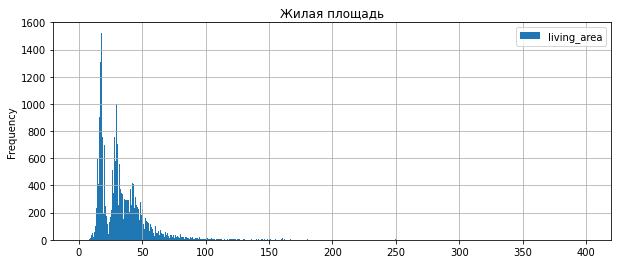

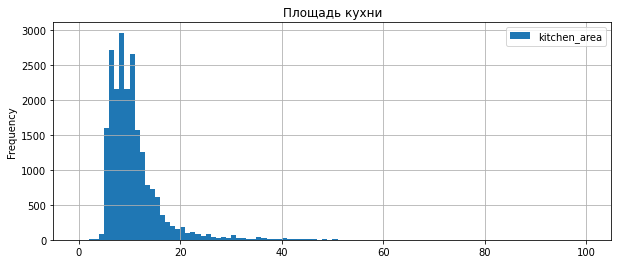

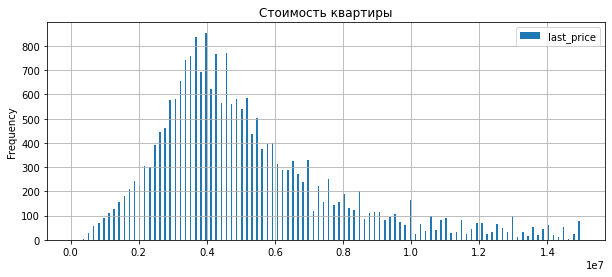

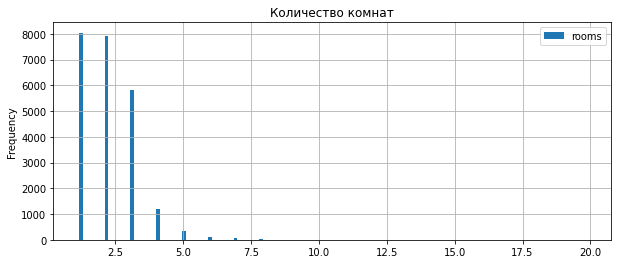

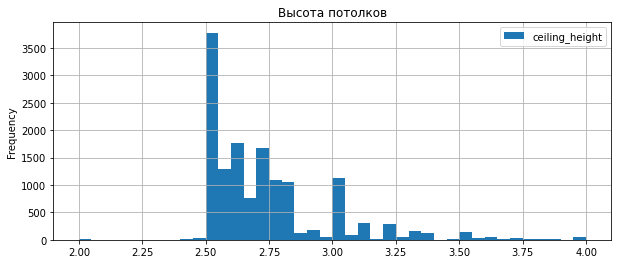

In [38]:
# общая площадь
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (10,5),
          title = 'Общая площадь')
#data.total_area.hist(bins = 100, figsize = (10,4), range = (0,100), legend = True,title = 'Общая площадь')
data['total_area'].hist()

# жилая площадь
data.plot(y = 'living_area', kind = 'hist', bins = 500, grid=True, figsize = (10,4),
         range = (0,400),rwidth = 500, title = 'Жилая площадь')
data['living_area'].describe()


# площадь кухни
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (10,4), range = (0,100),title = 'Площадь кухни')
data['kitchen_area'].describe()


# цена квартиры
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (10,4),\
          range = (0,15000000),title = 'Стоимость квартиры',rwidth = 0.3)
data['last_price'].describe()


# количетство комнат
data['rooms'].max()
data.plot(y = 'rooms', kind = 'hist', bins = 40, grid=True, figsize = (10,4), range = (1,20),\
          title = 'Количество комнат',rwidth = 0.3)
data['rooms'].describe().round(1)


# высота потолков
data.plot(y = 'ceiling_height', kind = 'hist', bins = 40, grid=True, figsize = (10,4),\
          range = (2,4),title = 'Высота потолков')
data['ceiling_height'].describe().round(1)



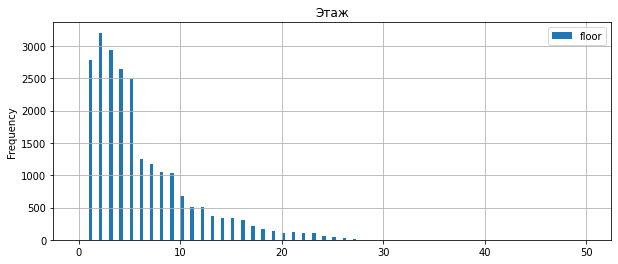

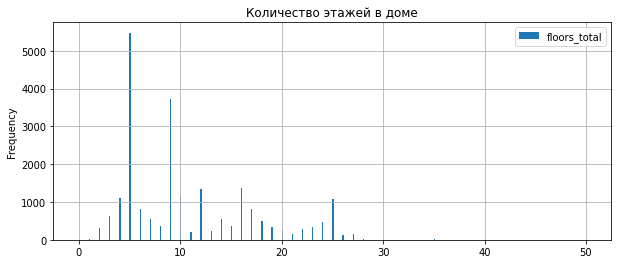

count    22758.0
mean        10.8
std          6.6
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         36.0
Name: floors_total, dtype: float64

In [59]:
# на каком этаже находится квартира
#data['floor'] = data['floor'].astype('int')

data.plot(y = 'floor', kind = 'hist', bins = 150, grid=True, figsize = (10,4), range = (0,50),title = 'Этаж')
data['floor'].describe().round(1)

# общее количество этажей в доме

data.plot(y ='floors_total',\
          kind = 'hist',\
          bins = 400, 
          grid=True,
          figsize = (10,4),
          range = (0,50),\
          title = 'Количество этажей в доме')

plt.show()
data['floors_total'].describe().round(1)


count      22758
unique         3
top       другой
freq       16853
Name: floor_category, dtype: object

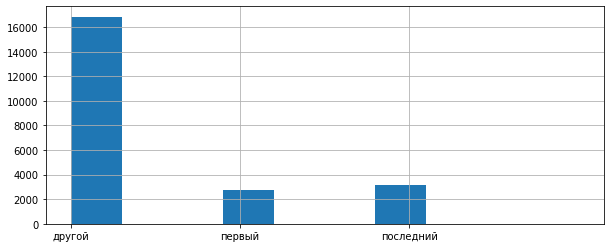

In [60]:
# категория этажа
data['floor_category'] = data['floor_category'].convert_dtypes()
data['floor_category'].hist(bins = 10,figsize = (10,4), range = (0,3))
data['floor_category'].describe()
# меньше всего квартир продается на 1 и последних этажах

count    17059.0
mean       493.4
std        231.9
min          1.0
25%        452.0
50%        498.3
75%        498.3
max       3190.0
Name: parks_nearest, dtype: float64

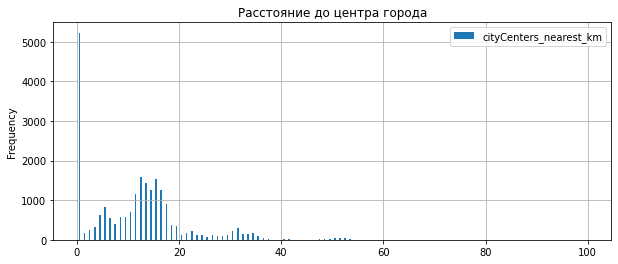

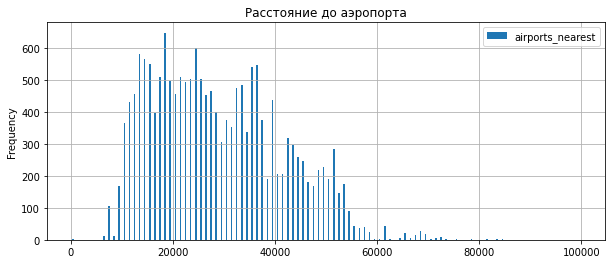

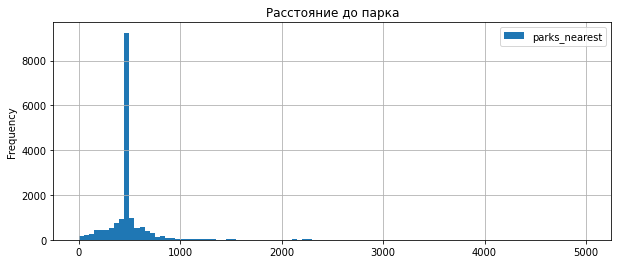

In [61]:
# расстояние до центра

data.plot(y = 'cityCenters_nearest_km', kind = 'hist', bins = 100, grid=True, figsize = (10,4), range = (0,100),\
          title = 'Расстояние до центра города',rwidth = 0.3)
data['cityCenters_nearest_km'].describe().round(1)

# расстояние до аэропорта

data.plot(y = 'airports_nearest', kind = 'hist', bins = 100, grid=True, figsize = (10,4), range = (0,100000),\
         title = 'Расстояние до аэропорта',rwidth = 0.3)
data['airports_nearest'].describe().round(1)

# расстояние до парка

data.plot(y = 'parks_nearest', kind = 'hist', bins = 100, grid=True, figsize = (10,4), range = (0,5000),\
          title = 'Расстояние до парка')
data['parks_nearest'].describe().round(1)


count    22758.000000
mean         2.566658
std          1.787945
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_publication, dtype: float64

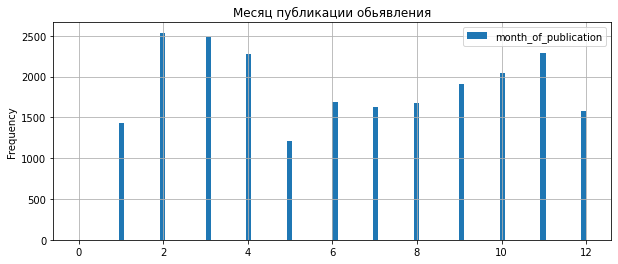

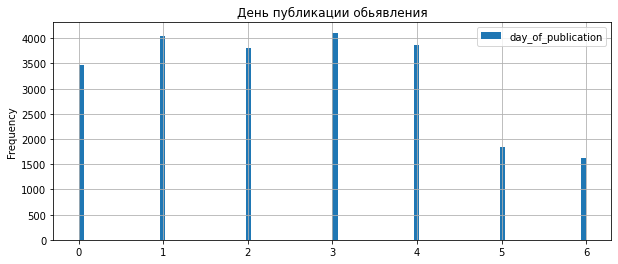

In [62]:
# дата публикации объявлений
data.plot(y ='month_of_publication', kind = 'hist', bins = 100, grid=True, figsize = (10,4),\
          range = (0,12), title = 'Месяц публикации обьявления')
data['month_of_publication'].describe()

# день публикации объявлений
data.plot(y ='day_of_publication', kind = 'hist', bins = 100, grid=True, figsize = (10,4),\
          range = (0,6), title = 'День публикации обьявления')
data['day_of_publication'].describe()


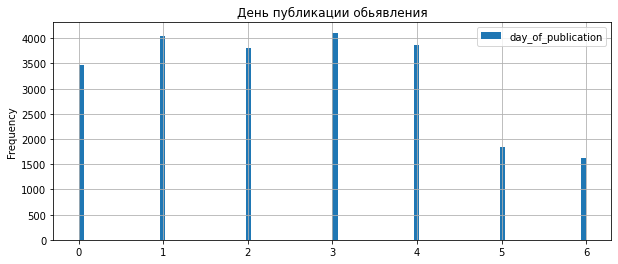

In [63]:
# check

data.plot(y ='day_of_publication', kind = 'hist', bins = 100, grid=True, figsize = (10,4),\
          title = 'День публикации обьявления');

**Выводы:**  

**1.** Средняя площадь продаваемых квартир = 60 м², а медиана = 52 м². Средняя стоимость квартиры равна 6,5 млн руб., медиана 4,6 млн руб;  
**2.** Больше всего высталено на продажу двухкомнатных квартир;  
**3.** Среднее значение высоты потолков - 2,77 м, медиана 2,65 м. В данных есть аномальные значение, но их число незначительно;     
**4.** Меньше всего квартир продается на первых и последних этажах;    
**5.** Медианное расстояние от дома до аэропорта составляет 26 км. От дома до парка - 452 метра, до центра города 13 км;    
**6.** Большая часть обьявлений публикуется в рабочие дни 
**7** Летом цена квартир ниже


### Как быстро продавались квартиры  ###  



In [64]:
data['days_exposition'].max()

3058.0

count    22758.0
mean       372.0
std        548.0
min          3.0
25%         45.0
50%        121.0
75%        382.0
max       3058.0
Name: days_exposition, dtype: float64

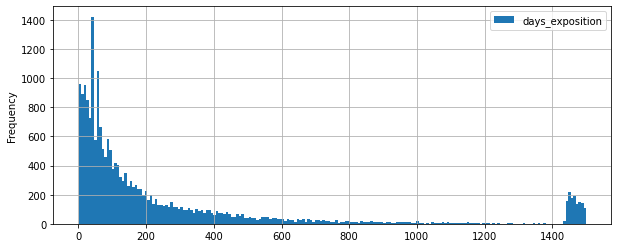

In [65]:

# построим гистограмму
data.plot(y = 'days_exposition', kind = 'hist', bins = 200, grid = True, range = (1,1500),figsize = (10,4))
# изучим данные столбца
data['days_exposition'].describe().round()
                     

In [66]:
data['days_exposition'].quantile()

121.0

**Вывод**  
Максимально квартира продавалась 3057 дней, минимально 3 дня. Среднее значение 372 дней.   
Быстрыми можно считать продажи до 4 месяцев
Долгими - продажи от полугода до года


### Факторы, больше всего влияющие на стоимость квартиры ###


#### Зависимость цены квартиры от общей площади ####

In [67]:
data['total_area']

0        108.00
1         40.40
2         56.00
4        100.00
5         30.40
          ...  
23694    133.81
23695     59.00
23696     56.70
23697     76.75
23698     32.30
Name: total_area, Length: 22758, dtype: float64

0.8

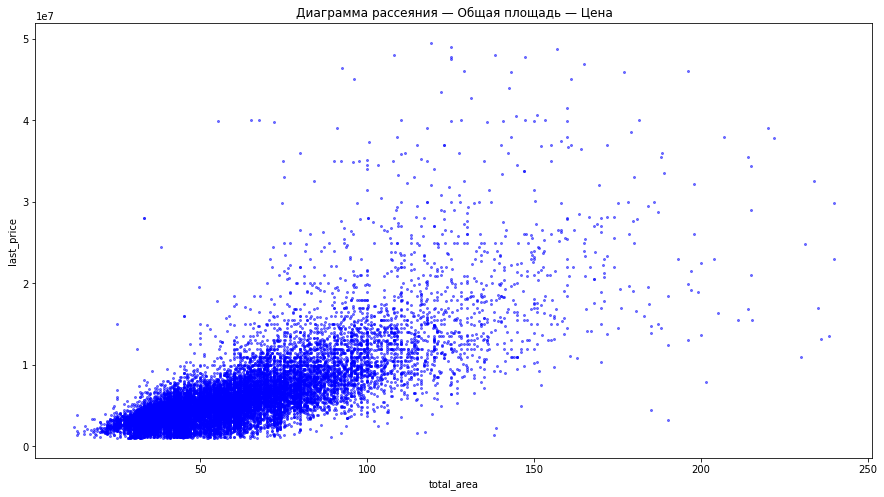

In [68]:
# print(data.head())
# Изучим зависимость цены и площади квартиры. 
data.plot(kind='scatter',y='last_price',
          x='total_area', alpha=0.5, 
          subplots=True, figsize=(15,8),
          c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Цена')
data['total_area'].corr(data['last_price']).round(1)

#### Зависимость цены квартиры от жилой площади ####

0.6

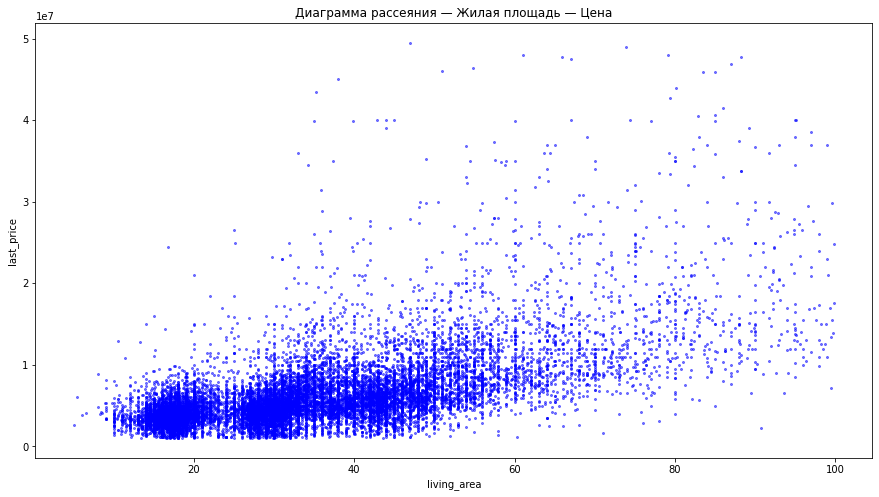

In [69]:
data.plot(kind='scatter',y='last_price',
          x='living_area', alpha=0.5, 
          subplots=True, figsize=(15,8),
          c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — Цена')

data['living_area'].corr(data['last_price']).round(1)


Корреляция средняя. Увеличение общей стоимости с увеличением жилой площади.

#### Зависимость цены квартиры от площади кухни ####

In [39]:
# вычислим корреляцию данных
data['kitchen_area'].corr(data['last_price']).round(1)


0.5

Кореляция слабая. Небольшая зависимость стоимости квартиры от метража кухни


#### Зависимость цены квартиры от количества комнат ####

0.36

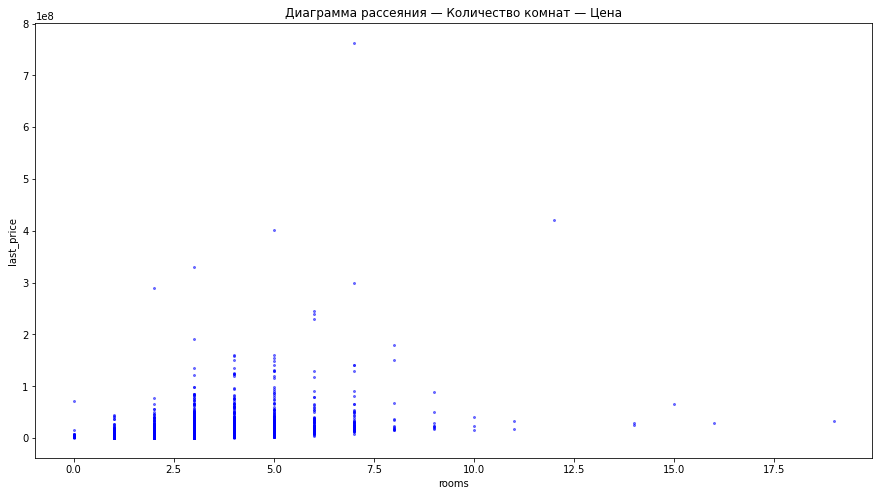

In [40]:
data.plot(kind='scatter',y='last_price',
          x='rooms', alpha=0.5, 
          subplots=True, figsize=(15,8),
          c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Количество комнат — Цена')
# вычислим корреляцию
data['rooms'].corr(data['last_price']).round(2)


Корреляция слабая. Стоимость квартиры немного увеличивается в зависимости от числа комнат. Но это не основной фактор, влияющий на цену


#### Зависимость цены квартиры от типа этажа ####

,mean,count,median
floor_category,,,
другой,6.657746e+06,17340,4840000.0
первый,4.801695e+06,2912,3900000.0
последний,7.340322e+06,3330,4300000.0


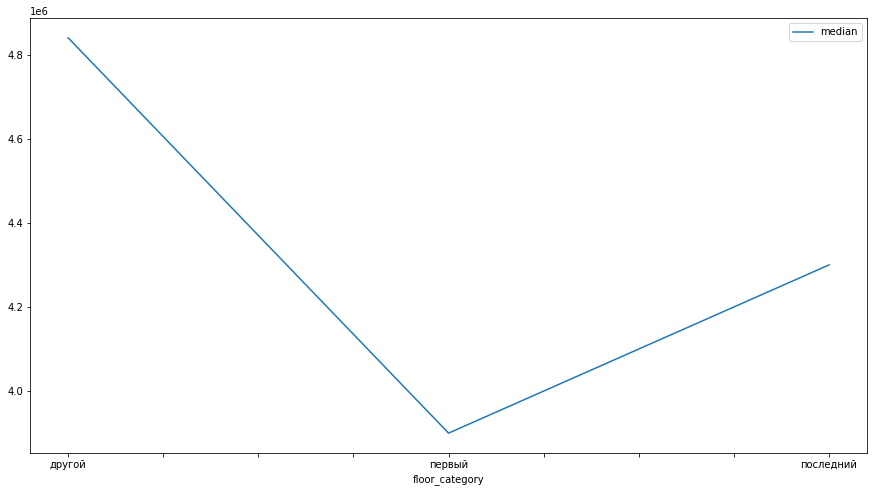

In [41]:
pivot_table_floor_category = data.pivot_table(index = 'floor_category', 
                                              values = 'last_price',
                                              aggfunc = ['mean', 'count', 'median']
                                              )
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median',figsize=( 15 , 8 ))
pivot_table_floor_category



**Вывод**
Квартиры на первом этаже дешевле квартир на последнем этаже. Но квартиры на других этажах дороже на 13%, чем квартиры на первом и последнем этажах.

#### Зависимость цены квартиры от даты размещения (день недели, месяц, год) ####

##### Зависимость цены квартиры  от дня недели #####

,mean,count,median
day_of_publication,,,
1,6.372903e+06,4172,4704595.0
2,6.604391e+06,3964,4700000.0
0,6.505221e+06,3610,4650000.0
3,6.677516e+06,4288,4640000.0
4,6.373868e+06,3998,4590000.0
5,6.964526e+06,1934,4550000.0
6,6.246180e+06,1699,4550000.0


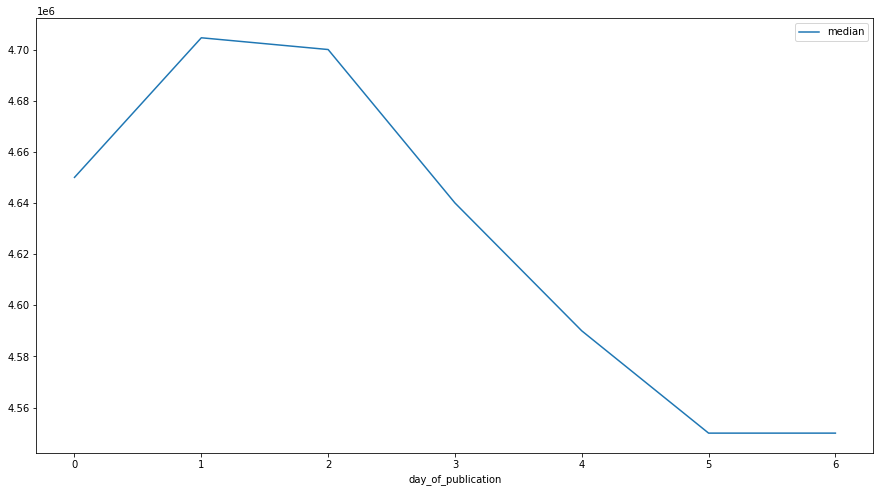

In [42]:
pivot_table_day_of_publication = data.pivot_table(index ='day_of_publication', values ='last_price',\
                                                  aggfunc = ['mean', 'count', 'median'])
pivot_table_day_of_publication.columns = ['mean', 'count', 'median']
pivot_table_day_of_publication.plot(y = 'median',figsize=( 15 , 8 ))
pivot_table_day_of_publication.sort_values('median', ascending = False)

По графику видим: цена квадратного метра выше в обьявлениях, выставленных со вторника по среду.К пятнице снижается число опубликованных обьявления. Скорее всего это связано с рабочим графиком, так как в будни публикуется большая часть обьявлений.

##### Зависимость цены квартиры  от месяца #####

,mean,count,median
month_of_publication,,,
4,6.738139e+06,2376,4800000.0
9,6.825470e+06,1981,4700000.0
11,6.447040e+06,2368,4700000.0
12,6.921942e+06,1626,4680000.0
2,6.468500e+06,2640,4650000.0
3,6.359275e+06,2587,4650000.0
7,6.649337e+06,1695,4650000.0
1,6.552155e+06,1488,4600000.0
8,6.350233e+06,1744,4570000.0


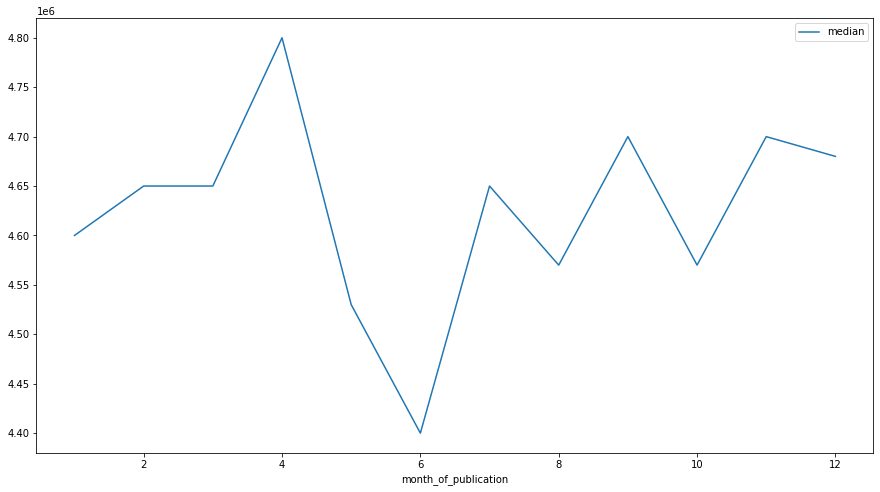

In [43]:
pivot_table_month_of_publication = data.pivot_table(index = 'month_of_publication',
                                                    values = 'last_price',
                                                    aggfunc = ['mean', 'count', 'median'])
pivot_table_month_of_publication.columns = ['mean', 'count', 'median']
pivot_table_month_of_publication.plot(y = 'median',figsize=(15, 8))

pivot_table_month_of_publication.sort_values('median', ascending = False)


Самая высокая стоимость в апреле, самая низкая стоимость в июне.  
Это связано с сезонностью. Летом, в сезон отпусков, спрос меньше - поэтому цены ниже. 

##### Зависимость  цены квартиры от года #####

,mean,count,median
year_of_publication,,,
2014,1.135684e+07,119,7265000.0
2015,8.445718e+06,1179,5301000.0
2019,6.784181e+06,2875,5050000.0
2016,6.827912e+06,2783,4550000.0
2018,5.950966e+06,8519,4550000.0
2017,6.585729e+06,8190,4500000.0


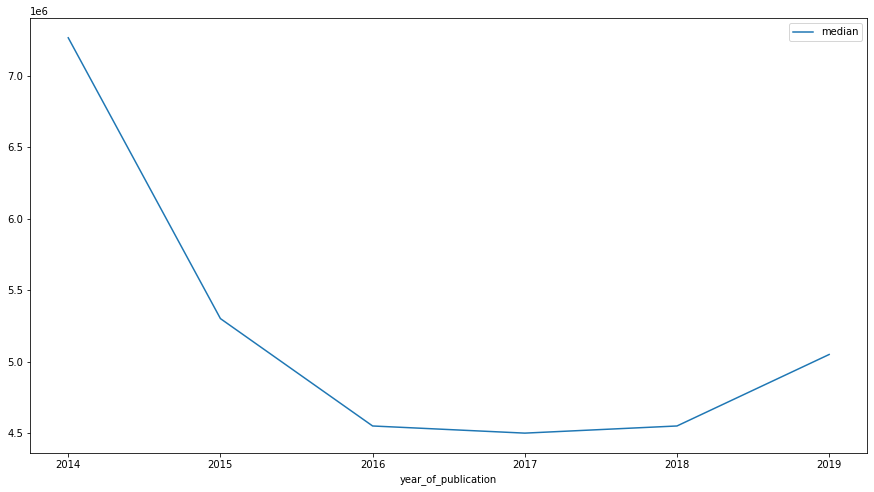

In [44]:
pivot_table_year_of_publication = data.pivot_table(index = 'year_of_publication', 
                                                   values = 'last_price',
                                                   aggfunc = ['mean', 'count', 'median'])
pivot_table_year_of_publication.columns = ['mean', 'count', 'median']
pivot_table_year_of_publication.plot(y = 'median',figsize=(15, 8))
pivot_table_year_of_publication.sort_values('median', ascending = False)


In [45]:
data.pivot_table(index = 'year_of_publication', values='day_of_publication', aggfunc = ['mean', 'count', 'median'])



,mean,count,median
,day_of_publication,day_of_publication,day_of_publication
year_of_publication,,,
2014,2.210084,119,2
2015,2.478372,1179,2
2016,2.540424,2783,2
2017,2.633822,8190,3
2018,2.580115,8519,3
2019,2.439652,2875,2


In [46]:
data.pivot_table(index = 'year_of_publication',
                 values = 'total_area',
                 aggfunc = ['mean', 'count', 'median'])


,mean,count,median
,total_area,total_area,total_area
year_of_publication,,,
2014,83.595462,119,75.03
2015,70.905785,1179,60.00
2016,62.156144,2783,53.10
2017,60.759249,8190,52.00
2018,57.677386,8519,50.50
2019,59.490984,2875,52.00


In [47]:
#sns.pairplot(data[['year_of_publication','last_price', 'total_area', 'rooms']])
#plt.gcf().set_size_inches(12,12);

In [79]:
data.pivot_table(index = 'year_of_publication',
                 values = ['total_area','rooms','last_price'],
                 aggfunc = ['mean']).round()


mean                 
                     last_price rooms total_area
year_of_publication                             
2014                 10338927.0   2.0       80.0
2015                  6596513.0   2.0       64.0
2016                  5892901.0   2.0       59.0
2017                  5674295.0   2.0       57.0
2018                  5612944.0   2.0       56.0
2019                  6143024.0   2.0       57.0

**Вывод**  
  
На стоимость квартиры больше всего влияет общая и жилая площадь,количество комнат и этаж квартиры. Самая низкая стоимость у квартир на первом и последнем этаже. Чем больше комнат, чем выше цена квартиры. 
От даты публикации объявления также зависит стоимость, самые дешевые квартиры продаются в июне, самые дорогие в апреле.  
Самая низкая цена квартиры зафиксирована в 2016 году. С 2014 года цены снизились. На это могло повлиять уменьшение средней площади квартир и увеличение числа обьявлений, с 2018 года цены на квартиры растут, растет средняя площадь растет и снижается предложение 


### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Населённые пункты с самой высокой и низкой стоимостью квадратного метра.  ###


,count,mean
locality_name,,
Санкт-Петербург,15694,114752.0
Мурино,590,86088.0
поселок Шушары,440,78677.0
Всеволожск,397,68632.0
Пушкин,368,103051.0
Колпино,338,75425.0
поселок Парголово,327,90176.0
Гатчина,307,68746.0
деревня Кудрово,299,92474.0


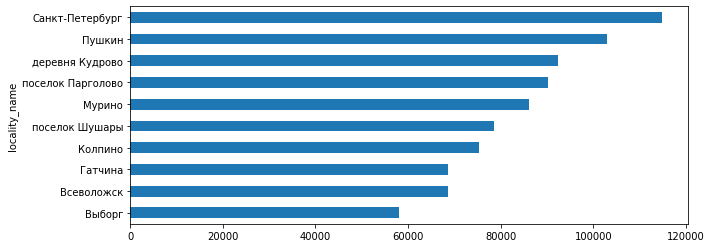

In [48]:
#делаем сводную таблицу
locality_pivot_table = data.pivot_table(index = 'locality_name',\
                                        values = 'square_meter_price',\
                                        aggfunc=['count','mean'])
locality_pivot_table.columns = ['count','mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).round().head(10)

#вычисляем города с самой высокой и низкой стоимостью м2
mean_pivot = locality_pivot_table.head(10)
mean_pivot['mean'].mean()
locality_pivot_table['mean'].sort_values(ascending = True)\
                            .plot(kind = 'barh',figsize = (10,4))


locality_pivot_table

**Вывод**  
  
Средняя стоимость квадратного метра в 10 населённых пунктах с наибольшим числом объявлений - 83831 руб.    
Самая высокая стоимость м² в городе Санкт-Петербург. Самая низкая в г. Выборг.

### Как стоимость объектов зависит от расстояния до центра города (на примере Санкт-Петербурга). ###

<AxesSubplot:xlabel='cityCenters_nearest_km'>

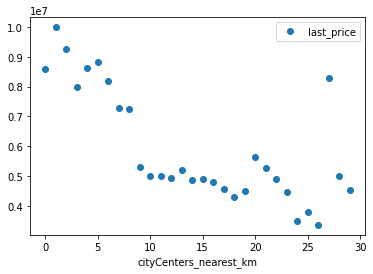

In [83]:
#заменим пустые значения столбца на 1111111

data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(1111111)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')

#фильтруем данные, строим график
pivot_table_km = data.query('locality_name == "Санкт-Петербург"and cityCenters_nearest_km !=1111111')\
                            .pivot_table(index = 'cityCenters_nearest_km',
                            values = 'last_price', aggfunc = 'median')
pivot_table_km.plot( style = 'o')


In [84]:
data = data.sort_values('cityCenters_nearest_km')
d = data
d = d.loc[d ['cityCenters_nearest_km'] == 27]
d.describe()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_of_publication,month_of_publication,year_of_publication,cityCenters_nearest_km
count,99.000000,9.900000e+01,99.000000,99.000000,99.000000,99.000000,96.000000,99.000000,99.000000,99.000000,...,99.000000,67.000000,99.000000,69.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.0
mean,9.070707,5.589663e+06,52.604848,1.929293,2.674949,6.434343,31.175729,3.909091,8.269798,0.515152,...,0.797980,399.202585,0.707071,472.294478,360.858586,101432.746323,2.616162,6.525253,2017.333333,27.0
std,5.568227,4.051948e+06,22.137232,0.917545,0.211416,4.271791,13.544249,3.094072,4.452378,1.119071,...,1.097119,196.246833,1.239260,149.105432,518.431721,30811.508165,1.904383,3.812823,0.989743,0.0
min,0.000000,1.980000e+06,27.000000,0.000000,2.500000,2.000000,14.000000,1.000000,5.000000,0.000000,...,0.000000,20.000000,0.000000,153.000000,3.000000,63342.318059,0.000000,1.000000,2014.000000,27.0
25%,5.000000,3.375000e+06,34.150000,1.000000,2.500000,4.000000,18.000000,2.000000,5.500000,0.000000,...,0.000000,308.000000,0.000000,482.988701,60.500000,76860.231272,1.000000,3.000000,2017.000000,27.0
50%,9.000000,4.240000e+06,50.000000,2.000000,2.650000,5.000000,30.000000,3.000000,7.000000,0.000000,...,0.000000,404.297170,0.000000,482.988701,157.000000,96250.000000,3.000000,7.000000,2017.000000,27.0
75%,12.000000,6.150000e+06,63.300000,3.000000,2.650000,9.000000,39.775000,5.000000,9.100000,1.000000,...,1.000000,434.148585,1.000000,482.988701,342.500000,114883.751593,4.000000,10.000000,2018.000000,27.0
max,23.000000,2.950000e+07,145.000000,4.000000,3.500000,24.000000,76.300000,17.000000,30.000000,5.000000,...,3.000000,1496.000000,3.000000,986.000000,1988.000000,256521.739130,6.000000,12.000000,2019.000000,27.0


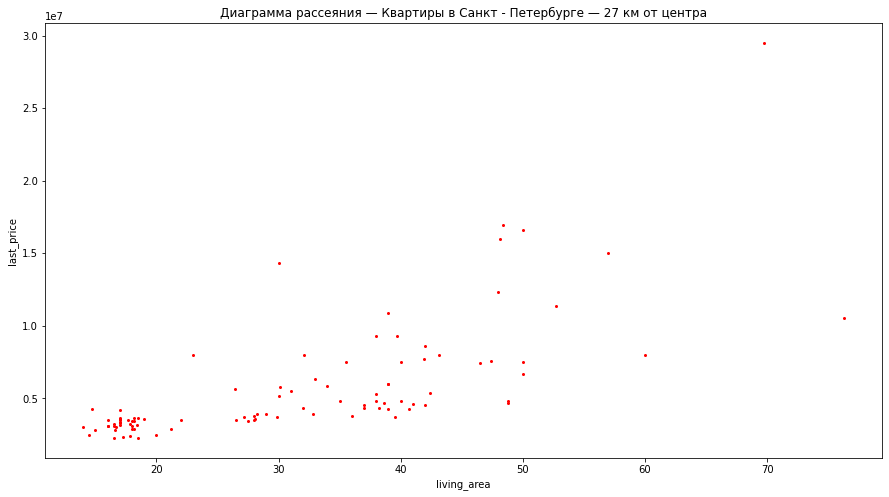

In [85]:
d.plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=1, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Квартиры в Санкт - Петербурге — 27 км от центра');


На 27 км есть обьекты с площадью до 145 м2 квадратов и высокой ценой. Это может обьяснить выброс.

In [86]:
new_data = data
new_data = new_data.loc[new_data ['locality_name'] == 'Санкт-Петербург']
new_data = new_data.loc[(new_data['cityCenters_nearest_km'] >= 3 )]

piter_pivot = new_data.pivot_table(index ='floor_category', values = 'cityCenters_nearest_km', aggfunc = 'count')
print('Квартиры в 3 км от центра Санкт-Петербурга')
piter_pivot

Квартиры в 3 км от центра Санкт-Петербурга


,cityCenters_nearest_km
floor_category,
другой,11488
первый,1499
последний,1672


In [87]:
new_data = new_data.loc[(new_data['cityCenters_nearest_km'] <= 4)]
piter_pivot = new_data.pivot_table(index ='floor_category', values = 'cityCenters_nearest_km', aggfunc = 'count')
print('Квартиры в 4 км от центра Санкт-Петербурга')
piter_pivot

Квартиры в 4 км от центра Санкт-Петербурга


,cityCenters_nearest_km
floor_category,
другой,633
первый,130
последний,175


In [88]:
new_data = new_data.loc[(new_data['cityCenters_nearest_km'] <= 5)]
piter_pivot = new_data.pivot_table(index ='floor_category', values = 'cityCenters_nearest_km', aggfunc = 'count')
print('Квартиры в 5 км от центра Санкт-Петербурга')
piter_pivot

Квартиры в 5 км от центра Санкт-Петербурга


,cityCenters_nearest_km
floor_category,
другой,633
первый,130
последний,175


In [89]:
new_data = data
new_data = new_data.loc[new_data ['locality_name'] == 'Санкт-Петербург']
new_data = new_data.loc[(new_data['cityCenters_nearest_km'] == 3 )]

piter_pivot = new_data.pivot_table(index ='floor_category', values = 'cityCenters_nearest_km', aggfunc = 'count')
print('Квартиры в 3 км от центра Санкт-Петербурга')
piter_pivot

Квартиры в 3 км от центра Санкт-Петербурга


,cityCenters_nearest_km
floor_category,
другой,187
первый,53
последний,74


In [90]:
new_data = data
new_data = new_data.loc[new_data ['locality_name'] == 'Санкт-Петербург']
new_data = new_data.loc[(new_data['cityCenters_nearest_km'] == 5)]
piter_pivot = new_data.pivot_table(index ='floor_category', values = 'cityCenters_nearest_km', aggfunc = 'count')
print('Квартиры в 5 км от центра Санкт-Петербурга')
piter_pivot

Квартиры в 5 км от центра Санкт-Петербурга


,cityCenters_nearest_km
floor_category,
другой,623
первый,77
последний,126


In [91]:
#data.info()

**Вывод**  
  
Чем ближе дом расположен к центру, тем выше стоимость квадратного метра. Стоимость квадратного метра заметнее меняется при удалении от центра от 1 до 10 км. При покупке квартиры в 10 - 25 км удаленности от центра, выгоднее покупать квартиру ближе к центру, так как стоимость м² у квартра в этих районах повышается незначительно.  
Но есть исключения, на расстоянии 27 км от центра есть дорогое жилье большого метража. 

Большинство продающихся квартир на расстоянии от центра 3-5 км находятся не на первом или последнем этаже
В 3 км от центра 80% продаваемых квартир находятся не на первом или последнем этаже.Такие квартиры стоят дороже, они могут создавать пик на графике. В 3 км продается больше квартир, чем в 4 или 5 км от центра.
В 5 км от центра 71% продаваемых квартир находятся не на первом или последнем этаже. В 5 км продается меньше недвижимости, чем ближе к центра(в 3 км от центра)


### Общий вывод

Мы изучили общую информацию датасета, провели предобработку данных, добавили в датасет новые столбцы, необходимые для расчетов и изучили связь стоимости квадратного метра с другими параметрами жилья.  
Датасет содержит обьявления о продаже квартир с 2014 до 2019 годы.  
  
В ходе предобработке мы очистили данные от аномальных значений (восстановили пропущенные значения или удалили данные), заполнили пропущенные значения там, где это возможно, изменили тип данных, устранили неявные дубликаты. Обосновали все шаги предобработки данных.  
Потеря данных после предобработки составила 4%.   
  
Исходя из полученных данных можно сделать обзор типичного обьявления о продаже квартиры в данном регионе. Средняя площадь квартиры, выставленной на продажу - 60 м². Чаще всего продают двухкомнатных квартиры. Больше всего объявлений о продажи квартир на 4-ом этаже 8-ми этажного дома. Меньше всего квартир продается на первых и последних этажах.   
В среднем квартиру в данном регионе можно продать за полгода.Максимально квартира продавалась 1580 дня, минимально 1 день. Среднее значение 179 дней.
Максимально квартира продавалась 3057 дней, минимально 3 дня. Среднее значение 372 дней.   
Быстрыми можно считать продажи до 4 месяцев
Долгими - продажи от года.

На стоимость квадратного метра квартиры больше всего влияет общая и жилая площадь, количество комнат и этаж квартиры. Самая низкая стоимость у квартир на первом и последнем этаже.
От даты публикации объявления также зависит стоимость, так как рынку недвижимости присуща сезонность. Самая высокая стоимость в апреле. Самая низкая стоимость обнаружена в объявлениях, опубликованных в июне. Летом, в сезон отпусков, как правило спрос покупку жилья снижается.
По сравнению с 2014 годом цены на квартиры к 2016 году упали на 10%,это может быть связано с снижением средней площади квартир.С 2016 года цены на квартиры начинают растут, и немного повышается средняя площадь.  
  
В Санкт-Петербурге стоимость квадратного метра (помимо вышеперечисленных параметров) зависит от удаленности от центра.Чем ближе дом расположен к центру, тем выше стоимость квадратного метра. Стоимость квадратного метра заметно меняется при удалении от центра от 1 до 10 км. Однако, квартиры, находящиеся в удалении от центра в 10-25 км, незначительно отличаются по цене. Но есть исключения - недвижимость большого метража(от 100 м2), удаленная от центра.
  